**1.导入需要的库**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #画图
from sklearn.datasets import load_boston #波士顿房价
from sklearn.impute import SimpleImputer #用于填补缺失值
from sklearn.ensemble import RandomForestRegressor #随机森林回归
from sklearn.model_selection import cross_val_score #交叉验证

**2.以波士顿数据集为例，导入完整的数据集并探索**

In [2]:
dataset = load_boston()
dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
dataset.target #标签是数值型数据使用回归

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [4]:
dataset.data.shape #506个样本，13个特征

(506, 13)

In [5]:
#将完整数据信息导出
X_full, y_full = dataset.data, dataset.target
n_samples = X_full.shape[0] #506
n_features = X_full.shape[1] #13

**3.为完整的数据集放入缺失值（假设50%）**

In [6]:
rng = np.random.RandomState(0) #确定随机模式，随机数种子
missing_rate = 0.5 #缺失值比率为50%
n_missing_samples = int(np.floor(n_samples * n_features * missing_rate)) #缺失值的个数，样本数*特征数*缺失值比率，向下取整（.0）再转化为整数格式
n_missing_samples

3289

In [7]:
#randint(下限,上限,n)：在下限和上限之间取出n个整数
missing_features = rng.randint(0,n_features,n_missing_samples) #缺失值的特征索引
missing_samples = rng.randint(0,n_samples,n_missing_samples) #缺失值的样本索引

In [8]:
len(missing_features)

3289

In [9]:
missing_features

array([12,  5,  0, ..., 11,  0,  2])

In [10]:
len(missing_samples)

3289

In [11]:
missing_samples

array([150, 125,  28, ..., 132, 456, 402])

In [12]:
X_missing = X_full.copy()
y_missing = y_full.copy()

In [13]:
X_missing[missing_samples, missing_features] = np.nan
X_missing #有了一些空值，可能有重复（不到3289个）

array([[       nan, 1.8000e+01,        nan, ...,        nan,        nan,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00,        nan, ...,        nan, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02,        nan, 7.0700e+00, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan, 1.1930e+01, ..., 2.1000e+01,        nan,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ...,        nan, 3.9690e+02,
        7.8800e+00]])

In [14]:
X_missing = pd.DataFrame(X_missing) #转化成数据框
X_missing

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,NaN,0.538,NaN,65.2,4.0900,1.0,296.0,NaN,NaN,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,2.0,NaN,NaN,396.90,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,61.1,NaN,2.0,242.0,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.458,NaN,45.8,NaN,NaN,222.0,18.7,NaN,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,NaN,NaN,NaN,NaN,18.7,NaN,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,NaN,NaN,0.0,0.573,NaN,69.1,NaN,1.0,NaN,21.0,NaN,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,NaN,396.90,9.08
503,NaN,NaN,11.93,NaN,0.573,6.976,91.0,NaN,NaN,NaN,21.0,NaN,5.64
504,0.10959,0.0,11.93,NaN,0.573,NaN,89.3,NaN,1.0,NaN,21.0,393.45,6.48


**4.使用0和均值填补缺失值**

In [15]:
#用均值填补
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean') #实例化，缺失值的形式是np.nan，填补使用均值
X_missing_mean = imp_mean.fit_transform(X_missing) #接口fit_transform：X_missing中所有的值导入到模型训练并返回

#False=0,True=1
pd.DataFrame(X_missing_mean).isnull().sum() #没有缺失值了

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [16]:
#用0填补
imp_0 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0) #实例化，缺失值的形式是np.nan，填补使用常数0
X_missing_0 = imp_0.fit_transform(X_missing) #接口fit_transform：X_missing中所有的值导入到模型训练并返回
pd.DataFrame(X_missing_0).isnull().sum() #没有缺失值了

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

**5.使用随机森林填补缺失值**

In [17]:
X_missing_reg = X_missing.copy()
X_missing_reg

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,NaN,0.538,NaN,65.2,4.0900,1.0,296.0,NaN,NaN,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,2.0,NaN,NaN,396.90,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,61.1,NaN,2.0,242.0,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.458,NaN,45.8,NaN,NaN,222.0,18.7,NaN,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,NaN,NaN,NaN,NaN,18.7,NaN,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,NaN,NaN,0.0,0.573,NaN,69.1,NaN,1.0,NaN,21.0,NaN,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,NaN,396.90,9.08
503,NaN,NaN,11.93,NaN,0.573,6.976,91.0,NaN,NaN,NaN,21.0,NaN,5.64
504,0.10959,0.0,11.93,NaN,0.573,NaN,89.3,NaN,1.0,NaN,21.0,393.45,6.48


In [18]:
X_missing_reg.isnull()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,True,False,True,True,False,True,False,False,False,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,False,False
2,False,True,False,False,True,False,False,True,False,False,True,True,True
3,True,True,True,False,False,True,False,True,True,False,False,True,True
4,True,False,False,False,True,False,True,True,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,True,True,True,False,False,True,False,True,False,True,False,True,False
502,False,False,False,False,False,False,False,False,False,False,True,False,False
503,True,True,False,True,False,False,False,True,True,True,False,True,False
504,False,False,False,True,False,True,False,True,False,True,False,False,False


In [19]:
X_missing_reg.isnull().sum(axis=0) #按列加和，每列的缺失值个数

0     200
1     201
2     200
3     203
4     202
5     201
6     185
7     197
8     196
9     197
10    204
11    214
12    189
dtype: int64

In [20]:
np.sort(X_missing_reg.isnull().sum(axis=0)) #这种排序没有索引

array([185, 189, 196, 197, 197, 200, 200, 201, 201, 202, 203, 204, 214],
      dtype=int64)

In [21]:
np.argsort(X_missing_reg.isnull().sum(axis=0)) #返回从小到大排序的顺序所对应的索引，索引为6的特征缺失最少，索引为11的特征缺失最多

0      6
1     12
2      8
3      7
4      9
5      0
6      2
7      1
8      5
9      4
10     3
11    10
12    11
dtype: int64

In [22]:
sortindex = np.argsort(X_missing_reg.isnull().sum(axis=0)).values #需要循环的顺序
sortindex

array([ 6, 12,  8,  7,  9,  0,  2,  1,  5,  4,  3, 10, 11], dtype=int64)

不套循环：填补缺失值

In [23]:
for i in sortindex:
    df = X_missing_reg.copy()
    fillc = df.iloc[:,i]
    df = pd.concat([df.iloc[:,df.columns != i],pd.DataFrame(y_full)],axis=1)
    
    df_0 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
    df_0 = df_0.fit_transform(df)
    
    Ytrain = fillc[fillc.notnull()]
    Ytest = fillc[fillc.isnull()]
    
    Xtrain = df_0[Ytrain.index,:]
    Xtest = df_0[Ytest.index,:]
    
    rfc = RandomForestRegressor(n_estimators=100)
    rfc = rfc.fit(Xtrain,Ytrain)
    Ypredict = rfc.predict(Xtest)
    
    X_missing_reg.loc[X_missing_reg.iloc[:,i].isnull(),i] = Ypredict

In [24]:
X_missing_reg.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [25]:
X_missing_reg

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.245768,18.000,6.8257,0.15,0.538000,6.61773,65.200,4.090000,1.00,296.00,18.425,391.2653,4.9800
1,0.027310,0.000,5.4961,0.00,0.469000,6.12953,78.900,4.967100,2.00,303.51,18.219,396.9000,9.1400
2,0.027290,9.020,7.0700,0.00,0.459940,7.18500,61.100,4.183217,2.00,242.00,18.129,389.8692,5.0203
3,0.108568,18.340,2.9172,0.00,0.458000,6.90353,45.800,4.708932,3.42,222.00,18.700,393.1879,5.9089
4,0.130238,0.000,2.1800,0.00,0.461285,7.14700,58.010,4.972228,3.92,257.26,18.700,392.7824,5.3300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.496892,1.925,11.4881,0.00,0.573000,6.24410,69.100,2.956740,1.00,294.15,21.000,391.3411,9.6700
502,0.045270,0.000,11.9300,0.00,0.573000,6.12000,76.700,2.287500,1.00,273.00,18.950,396.9000,9.0800
503,0.725675,0.180,11.9300,0.20,0.573000,6.97600,91.000,2.514139,5.07,374.19,21.000,383.4736,5.6400
504,0.109590,0.000,11.9300,0.08,0.573000,6.36819,89.300,2.812975,1.00,263.80,21.000,393.4500,6.4800


**6.对填补好的数据进行建模**

In [26]:
X = [X_full,X_missing_mean,X_missing_0,X_missing_reg]

mse = []

for x in X:
    estimator = RandomForestRegressor(random_state=0,n_estimators=100) #实例化，100颗树
    scores = cross_val_score(estimator,x,y_full,scoring="neg_mean_squared_error",cv=5).mean() #交叉验证5次，打分标准是负均方误差
    mse.append(scores * (-1))

In [27]:
mse

[21.571667100368845, 40.848037216676374, 49.626793201980185, 19.61065764224422]

In [28]:
[*zip(["X_full","X_missing_mean","X_missing_0","X_missing_reg"],mse)]

[('X_full', 21.571667100368845),
 ('X_missing_mean', 40.848037216676374),
 ('X_missing_0', 49.626793201980185),
 ('X_missing_reg', 19.61065764224422)]

**7.用所得结果画出条形图（横向）**

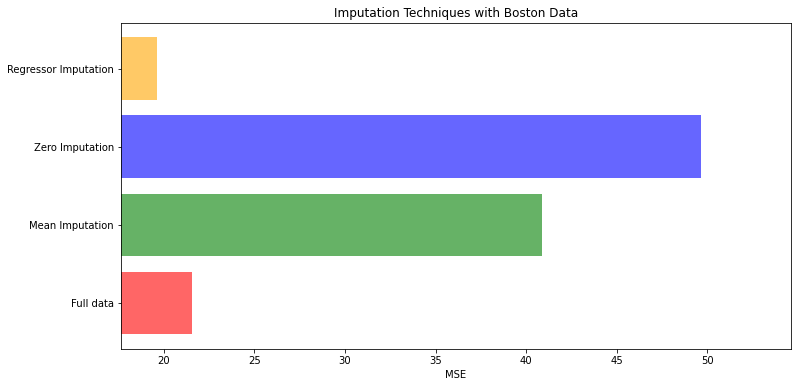

In [29]:
x_labels = ["Full data","Mean Imputation","Zero Imputation","Regressor Imputation"]
colors = ['r', 'g', 'b', 'orange']

plt.figure(figsize=(12,6)) #画布
ax = plt.subplot(111) #子图，后面所有命令都在其基础之上

for i in np.arange(len(mse)):
    ax.barh(i, mse[i], color=colors[i], alpha=0.6, align='center') #柱形图bar横向h，alpha条的粗度，条放在中间center
    
ax.set_title('Imputation Techniques with Boston Data') #图标题
ax.set_xlim(left=np.min(mse)*0.9,right=np.max(mse)*1.1) #x轴范围
ax.set_yticks(np.arange(len(mse))) #y轴刻度
ax.set_xlabel('MSE') #x轴的标题
ax.set_yticklabels(x_labels) #用x_labels的内容命名
plt.show()